In [ ]:
#Lab 6: Problem 2 in Counting (and related) problems
#This is using the generic counting function idea 
#You can write a much longer if condition, but this is the easiest way to write it.

def count_vowels(s):
    cnt = 0
    for i in range(0, len(s)):
        if s[i] in 'aeiou':
            cnt += 1
    return cnt

# Test cases:
print(count_vowels("computer"))

In [ ]:
#Lab 6: Problem 5 in Counting (and related) problems
#This is using the generic counting function idea 
#the if statement is based on the idea that we want to see if a particular character has been seen in s already or not
def count_unique(s):
    cnt = 0
    for i in range(len(s)):
        ch = s[i]
        #if ch is not in the string before its index
        if ch not in s[:i]:
            cnt += 1
    return cnt
  
count_unique("abracadabra")

In [ ]:
# Lab 6: Problem 2 in Problems involving building new strings
# This is using a generic string filtering idea
# This function returns the string s with capital letters removed.
def remove_capitals(s):
    newS = ''
    for i in range(0, len(s), 1):
        ch = s[i]
        if not ch.isupper():
            newS += ch
      
    return newS
  
remove_capitals("AbCDeFGhi9")

In [ ]:
#Lab 6: Problem 3 in Problems involving building new strings
#This is using the generic string filtering idea with a twist

def change_nums(s):
    newS = ''
    for i in range(0, len(s), 1):
        ch = s[i]
        if ch.isdigit():
            ch = int(ch) + 1
            newS += str(ch)
        else:
            newS += ch
    return newS

change_nums("a1b2")

In [ ]:
#Lab 6: Problem 4 in Problems involving building new strings
#This function takes in a string s and returns a copy of the string in reverse order

def reverse(s):
    rev = ''
    for i in range(len(s)-1, -1, -1):
        ch = s[i]
        rev += ch
    return rev

#Another way to solve this same problem is the following shortcut
def reverse2(s):
    return s[::-1]

reverse("abcdef")
#reverse2("abcdef")

In [ ]:
# Lab 6: Problem 5 in Problems involving building new strings
def encode(s):
    s = s.lower()
    letters = "abcdefghijklmnopqrstuvwxyz"
    
    newS = ''
    for i in range(0, len(s)):
        ch = s[i]
        #since letters is 0-based, and we want a=1, add 1 to the find return value
        ind = letters.find(ch) + 1
        #typecast the integer into a string and add it to your new string
        newS += str(ind) + "-"
    
    #Removing the last dash
    if len(newS) > 1:
        newS = newS[:-1]
    return newS

encode("abc")

In [ ]:
# Lab 6: (Challenge) decode function
def decode(s):
    letters = "abcdefghijklmnopqrstuvwxyz"
    newS = ''
    #If we don't know how many values the split function will return
    # we can put it into a single variable, which is now a list
    numbers = s.split("-")
    
    for i in range(0, len(numbers), 1):
        ind = int(numbers[i])-1
        newS += letters[ind]
    return newS


decode("1-2-3-24-19-11")

## Building a pig-latin translator

[Pig Latin](https://en.wikipedia.org/wiki/Pig_Latin) is a language game played by children that lets them communicate in a simple "code."  English words
are altered as follows:

- If a word begins with one or more consonants, the initial consonants are moved to the end of the word, and the suffix "ay" is attached.  For example, the word "computer" in Pig Latin becomes "computercay" and the word "paper" becomes "aperpay."  The word "professor" (beginning with two consonants) becomes "ofessorpray" and the word "string" (three initial consonants) becomes "ingstray."


- If a word begins with a vowel, the suffix "way" is attached (but no letters change positions).  For example,
the word "apple" becomes "appleway" and the word "igloo" becomes "iglooway."

1. Write a simplified Pig Latin function that assumes the word starts with just one consonant or just one vowel.  
This function should test whether the initial character is a consonant or vowel, move the initial consonant to the
end if necessary, and attach the appropriate suffix.  

    Hint: This can be done with an `if` statement and then creating a new string using string slicing and string concatenation.
    
    You may assume the string has only lowercase letters.

In [2]:
# First attempt at pig latin translator.  This will not handle words that begin with 
# multiple consonants in a row.

def pig_latin(word):
    initial = word[0]
    if initial in 'aeiou':
        return word + 'way'
    else:
        return word[1:] + initial + 'ay'
    
# Test cases
print(pig_latin("computer"))
print(pig_latin("paper"))
print(pig_latin("apple"))
print(pig_latin("igloo"))

omputercay
aperpay
appleway
iglooway


2. In order to handle words beginning with multiple consonants, we will write a function to detect
the first vowel in a word.

    Write a function called `first_vowel` that returns the **index** of the first vowel in a string.
    
    Guide:  Make a standard `for` loop over the word, examining
 every character.  Stop the loop when you find the
 first character that is a vowel.  Return the position
 of that character.

In [3]:
def first_vowel(word):
    for i in range(0, len(word)):
        if word[i] in 'aeiou':
            return i
    return -1 #shouldn't get here, but just in case no vowels
    
# Test cases
print(first_vowel("computer"))  # should return 1
print(first_vowel("paper"))     # should return 1
print(first_vowel("professor")) # should return 2
print(first_vowel("string"))    # should return 3
print(first_vowel("apple"))     # should return 0
print(first_vowel("igloo"))     # should return 0

1
1
2
3
0
0


3. Now write a better Pig Latin function that handles words that begin with multiple consonants.

    Hint: Start with your initial pig latin function from earlier, but modify the consonant section to 
    call your `first_vowel` function and capture the return value.  Use the return value variable as
    part of  two string slices to divide the string into the initial consonant section and everything after.
    Then use string concatenation to attach the slices together in the right order, and attach the "ay" suffix.

In [4]:
# Second attempt at pig latin translator.  This should handle words that begin with 
# multiple consonants in a row.

def pig_latin(word):
    initial = word[0]
    if initial in 'aeiou':
        return word + 'way'
    else:
        vowelInd = first_vowel(word)
        return word[vowelInd:] + word[:vowelInd] + 'ay'
    
    
# Test cases
print(pig_latin("computer"))
print(pig_latin("paper"))
print(pig_latin("apple"))
print(pig_latin("igloo"))
print(pig_latin("professor"))
print(pig_latin("string"))

omputercay
aperpay
appleway
iglooway
ofessorpray
ingstray


In [5]:
def piglatin_sentence(sentence):
    words = sentence.split(" ")
    new_sentence = ""
    for idx in range(0, len(words)):
        word = words[idx]
        pigword = pig_latin(word)
        new_sentence += pigword
        new_sentence += " "
    return new_sentence

# Test cases
print(piglatin_sentence("it was the best of times it was the worst of times"))
print(piglatin_sentence("call me ishmael"))
print(piglatin_sentence("it was a bright cold day in april and the clocks were striking thirteen"))
print(piglatin_sentence("as gregor samsa awoke one morning from uneasy dreams he found himself transformed in his bed into a gigantic insect"))

itway asway ethay estbay ofway imestay itway asway ethay orstway ofway imestay 
allcay emay ishmaelway 
itway asway away ightbray oldcay ayday inway aprilway andway ethay ocksclay ereway ikingstray irteenthay 
asway egorgray amsasay awokeway oneway orningmay omfray uneasyway eamsdray ehay oundfay imselfhay ansformedtray inway ishay edbay intoway away iganticgay insectway 


# Day 17: Lists

__List:__ an object that contains multiple data items
* __Element:__ An item in a list
* Format: `list = [item1, item2, etc.]`
* Can hold items of different types
* `print` function can be used to display an entire list
* `list()` function can convert certain types of objects to lists

In [ ]:
#A list of integers
even_numbers = [2, 4, 6, 8, 10]

#A list of strings:
names = ["Molly", "Steven", "Will", "Alicia"] 

#A list holding different types:
info = ["Alicia", 27, 1550.87]


In [ ]:
# Example code using lists

def main():
    #Create a list with some items
    food = ['Pizza', 'Burgers', 'Chips']
  
    #Display the list
    print("Here are the items in the food list: ")
    print(food)

main()

## Why Use Lists?
* Lists exist so programmers can store multiple related variables together.
* Useful when we don't know ahead of time how many items we are going to store.
* A single list can hold from zero to practically any number of items in it. 


## More about Lists
* Lists are created using square brackets around items separated by commas
* Lists are accessed using indices/positions just like strings.
* Most (but not all) string functions also exist for lists.

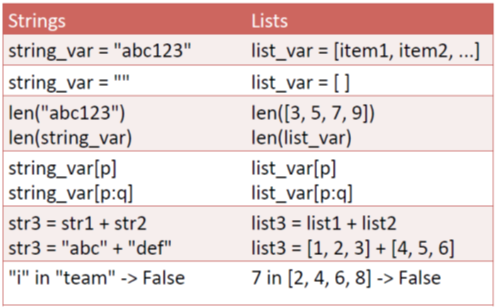

## One very important difference between strings and lists

Strings are __immutable__: you can't change a string without making a copy of it. 
```
    s = "abc" 
	s[0] = "A" 	 # illegal! 
	s = "A" + s[1:] # legal
```

Lists are mutable: can be changed "in-place" (without explicit copying) 
```
    L = [2, 4, 6, 8, 10] 
	L[0] = 15 		# legal 
	L.append(26) 	# legal
```

Let's compare mutable to unmuttable.
* How can we switch the first and last letter in a string?
* How can we switch the first and last items in a list?


In [ ]:
# Switching the first and last letter in a string
s = "ABCDE"
s = s[-1] + s[1:-1] + s[0]
print(s)

In [ ]:
# Switching the first and last item in a list

l = ['A', 'B','C', 'D', 'E']
temp = l[0]
l[0] = l[-1]
l[-1] = temp
print(l)

## Three common ways to make a list

1. Make a list that already has stuff in it:
```
lst = [4, 7, 3, 8]
```
2. Make a list of a certain length that has the same element in all positions:
```
lst = [0] * 4 	#makes the list [0,0,0,0]
```
<ul>
    <li>Common when you need a list of a certain length ahead of time.) </li>
    <li>Uses the repetition operator, similarly to strings</li>
</ul>

3. Make an empty list: 
```
lst = [] 
```
<ul>
    <li>Common when you're going to put things in the list coming from the user or a file.</li>
</ul>

## Simple list problem
How would we write a function to convert a number from 1-12 into the corresponding month of the year as a string? 

Ex: getmonth(2) should return "February"

In [ ]:
def getmonth(month):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', \
            'August', 'September', 'October', 'November', 'December']
  
    return months[month-1]

getmonth(2)  

## List Concatenation
Just like with 2 strings, you can "add" 2 lists together. It creates a new 1-D list with all the items from both lists in it.


In [ ]:
a = [1,2,3]
b = [4,5,6]
c = a + b
print(c)# prints [1, 2, 3, 4, 5, 6]

mylist = ['a','b','c']
other = ['d','e','f']
print(mylist + other)  #['a', 'b', 'c', 'd', 'e', 'f']


In [ ]:
#What will this code output?

lst = [2] * 3
lst2 = [4] * 2
lst3 = lst + lst2
for x in range(0, len(lst3), 2):
    lst3[x] = -1

print(lst3)

In [ ]:
# Examples of list slices 
# What will the following print statements output?
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#print(numbers[2: ])
#print(numbers[:-2])
#print(numbers[1:8:2])
#print(numbers[5::-1])
print(numbers[::-1])

In [ ]:
# Running total with lists program

def main():
    total = 0
    numbers = [2, 4, 6, 8, 10]
    for i in range(0, len(numbers)):
        value = numbers[i]
        total += value

    print("The total of the items is: ", total)

main()

In [ ]:
# Example using the repetition operator to initialize the list to all zeroes

def main():
    NUM_DAYS = 5
    sales = [0] * NUM_DAYS
  
    print("Enter the sales for each day.")
  
    for i in range(0, NUM_DAYS):
        print("Day #", i+1, ":", sep='', end='')
        sales[i] = float(input())

    
    print("Here are the values you entered.")
    for i in range(0, len(sales)):
        print(sales[i])

main()

## Practice
The following program has the main function written for you and stubs for 2 other functions that you will need to write.
* `findAverage(numbers)` – will return the average of all the numbers in the list
* `countNumbers(numbers, average)` - will return 2 values; it counts the number of above average and below average numbers in a list

In [ ]:
#Fill in the code for the following 2 functions, findAverage and countNumbers

#This function finds the average of a list of numbers
#Parameters: numbers, a list of integers
#Returns: average, a floating point number 
def findAverage(numbers):
  #REPLACE the pass call with your code
  pass
  

#This function counts the number of above average and below average numbers in a list
#Parameters: numbers, a list of integers; average, the average of the values in the list
#Returns: numBelow, the # of values below average; numAbove, the number of values above average
def countNumbers(numbers, average):
    numBelow = 0
    numAbove = 0

    #YOUR CODE GOES HERE
    
    return numBelow, numAbove


def main():
    numList = [62, 57, 35, 27, 45, 44, 46, 68, 86, 27, 88, 33,
               11, 61, 64, 45, 56, 9, 33, 32, 56, 63, 24, 26,
               100, 95, 62, 10, 87, 58, 69, 54, 75, 41, 22, 93,
               82, 16, 92, 49, 6, 71, 85, 59, 56, 22, 3, 50, 1,
               20, 54, 18, 27, 78, 17, 7, 41, 83, 92, 38, 5, 64,
               60, 92, 15, 26, 57, 39, 80, 41, 67, 56, 24, 77,
               28, 90, 24, 72, 2, 46, 75, 53, 58, 47, 50, 18,
               40, 65, 24, 58, 4, 58, 81, 40, 6, 77, 85, 86, 68]
    
    avg = findAverage(numList)
    print("Average is:", avg)
    below, above = countNumbers(numList, avg)
    print("Below Average:", below, "\nAbove Average:", above)

main()

## Finding Items in Lists with the in Operator
* You can use the `in` operator to determine whether an item is contained in a list
* General format: `item in list`
* Returns True if the item is in the list, or False if it is not in the list
* Similarly you can use the `not in` operator to determine whether an item is not in a list


In [ ]:
# Example using the in operator
def main():
    prod_nums = ['V475', 'F987', 'Q143', 'R688']
  
    search = input("Enter a product number: ")
  
    if search in prod_nums:
        print(search, "was found in the list.")
    else:
        print(search, "was not found in the list.")

main()

## List Methods and Useful Built-in Functions
(See list reference on the course website for a complete list of list methods)

* `append(item):` used to add items to a list – item is appended to the end of the existing list
* `index(item):` used to determine where an item is located in a list. It returns the index of the first element in the list containing item, and raises ValueError exception if item not in the list
* `insert(index, item):` used to insert item at position index in the list
* `sort():` used to sort the elements of the list in ascending order
* `remove(item):` removes the first occurrence of item in the list
* `reverse():` reverses the order of the elements in the list
* `del` statement: removes an element from a specific index in a list (General format: `del list[i]`)
* `min` and `max` functions: built-in functions that returns the item that has the lowest or highest value in a sequence. The sequence is passed as an argument (General format: `min(lst)`)
* `sum` function: built-in functions that returns the total of all the values in a sequence. The sequence is passed as an argument (General format: `sum(lst)`)

### `find` method does NOT exist for lists
`list_var.index(item)`: Searches left to right, returns position where found, but crashes if not found.	

Let’s build an algorithm that replicates find(), but works for lists (returns -1 if not found).


In [ ]:
# Example using the append method

def main():
    file = open("randomNums.txt", 'r')
    numbers = []
  
    for line in file:
        value = int(line)
        numbers.append(value)
    
    file.close()
    print(numbers)

main()

In [ ]:
# Example using the sort and insert methods

def main():
    names = ['James', 'Kathryn', 'Bill']
    names.sort()

    print("The list before the insert: ", names)
  
    names.insert(0, 'Joe')
  
    print("The list after the first insert: ", names)
  
    names.insert(2, 'Mary')
  
    print("The list after the second insert:", names)

main()

In [ ]:
# Examples using del, min, max, sum, and sort

def main():
    my_list = [5, 4, 3, 2, 50, 40, 30]
    print("Before Deletion: ", my_list)
    del my_list[2]
    print("After Deletion: ", my_list)

    print("The lowest value is", min(my_list))
    print("The highest value is", max(my_list))
    print("The sum of the values in my list is", sum(my_list))

    #Sorting a list - this will permanately change the order of the items in my_list 
    #There is no way to return my_list to it's orginal order after running the sort function
    my_list.sort()
    print("The sorted list is: ", my_list)
    print()

    alpha_list = ['a', 'b','c', 'd']
    print("The lowest value is", min(alpha_list))
    print("The highest value is", max(alpha_list))
    #You cannot take the sum of a list that has strings in it.

main()

In [ ]:
# Comparing Consecutive Items in a list

def main():
    numbers = [9, 1, 0, 2, 8, 6, 7, 5, 3, 4]
    deltas = []
  
    for i in range(1, len(numbers)):
        diff = numbers[i] - numbers[i-1]
        deltas.append(diff)
    
    print(deltas)

main()

## Practice
1. Write a program that randomly generates 20 integers between 1 and 50, and stores them in a list. Print out the lowest and the highest numbers in your list, as well as the sum of all the numbers in the list.

2. Write a function that prints out sums of adjacent pairs of numbers in the list. __Hint:__ You don’t need the sliding window technique; instead, use math with list indices.

3. Write a function that takes a list and shifts all the elements in the list one spot to the left, without using slices! (the left-most element disappears)

__Example:__ [1, 2, 3, 4, 5] turns into [2, 3, 4, 5, 5]

In [ ]:

#sum_adj([2, 3, 4, 5, 6, 7]) #uncomment to test

In [ ]:

# shift_left([1, 2, 3, 4, 5]) #uncomment to test

__Any questions on the review packet for Midterm 2?__


Please do the following:
* Zybooks Assignment 12 - due by 10am Friday
* Study for Midterm 2 and take it tomorrow between 10am-noon
* Complete Project 6 - due by 11:59pm Friday